# Clusteranalyse mit K-Means Verfahren

## Import Programmbibliotheken

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import scipy.cluster.hierarchy as shc
from pandas import read_csv
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import cdist

## Einlesen und Aufbereiten der Daten

In [11]:
# Read csv file 
packages_df = read_csv("https://raw.githubusercontent.com/Pfob/ClusteringScikitLearn/Marius/datasets/Packst%C3%BCcke.csv", sep=';', header=0)  

# Show first ten rows of dataframe 
packages_df.head(10)

,Package No,Shipment No,Gross Weight (kg),Width (cm),Height (cm),Length (cm)
0,1007530-2011-03239,1000088,23,35,30,35
1,1007530-2011-03241,1000310,150,60,55,80
2,1007530-2011-03242,1000346,"0,5",14,15,19
3,1007530-2011-03243,1000456,"1,5",20,20,29
4,1007530-2011-03244,1000796,1,10,10,10
5,1007530-2011-03245,1000957,75,82,81,120
6,1007530-2011-03246,1000957,41,80,34,120
7,1007530-2011-03247,1001184,1.340,220,112,406
8,1007530-2011-03249,1001408,"0,5",20,20,29
9,1007530-2011-03250,1001563,5,45,35,45


In [12]:
# show data types of columns
packages_df.dtypes

Package No           object
Shipment No           int64
Gross Weight (kg)    object
Width (cm)           object
Height (cm)           int64
Length (cm)           int64
dtype: object

In [13]:
packages_df[["Package No", "Shipment No"]] = packages_df[["Package No", "Shipment No"]].astype(str)

# Drop not needed columnss
relevant_data = packages_df.drop(["Package No", "Shipment No"], axis=1)


# Replace ',' with '.' (us standard)
relevant_data["Gross Weight (kg)"] = relevant_data.apply(lambda row: str(row["Gross Weight (kg)"]).replace(".", "").replace(",","."), axis=1)
relevant_data["Width (cm)"] = relevant_data.apply(lambda row: str(row["Width (cm)"]).replace(",", "."), axis=1)


# Convert to correct data type
relevant_data[["Gross Weight (kg)", "Width (cm)"]] = relevant_data[["Gross Weight (kg)", "Width (cm)"]].astype(float)
relevant_data[["Height (cm)", "Length (cm)"]] = relevant_data[["Height (cm)", "Length (cm)"]].astype(int)

# Calculate volume of each row
relevant_data["Volume (m³)"] = relevant_data.apply(lambda row: (row["Width (cm)"] * row["Height (cm)"] * row["Length (cm)"]) / 1000000, axis=1)
relevant_data["Volume (m³)"] = round(relevant_data["Volume (m³)"],4)
relevant_data.head(10)

,Gross Weight (kg),Width (cm),Height (cm),Length (cm),Volume (m³)
0,23.0,35.0,30,35,0.0368
1,150.0,60.0,55,80,0.2640
2,0.5,14.0,15,19,0.0040
3,1.5,20.0,20,29,0.0116
4,1.0,10.0,10,10,0.0010
5,75.0,82.0,81,120,0.7970
6,41.0,80.0,34,120,0.3264
7,1340.0,220.0,112,406,10.0038
8,0.5,20.0,20,29,0.0116
9,5.0,45.0,35,45,0.0709


In [14]:
# Save relevant Values Gross Weight and Volume
X = relevant_data.iloc[:,[0,4]].copy()

X.head(10)

,Gross Weight (kg),Volume (m³)
0,23.0,0.0368
1,150.0,0.2640
2,0.5,0.0040
3,1.5,0.0116
4,1.0,0.0010
5,75.0,0.7970
6,41.0,0.3264
7,1340.0,10.0038
8,0.5,0.0116
9,5.0,0.0709


## Visualisierung der Daten

Text(0, 0.5, 'Volume (m³)')

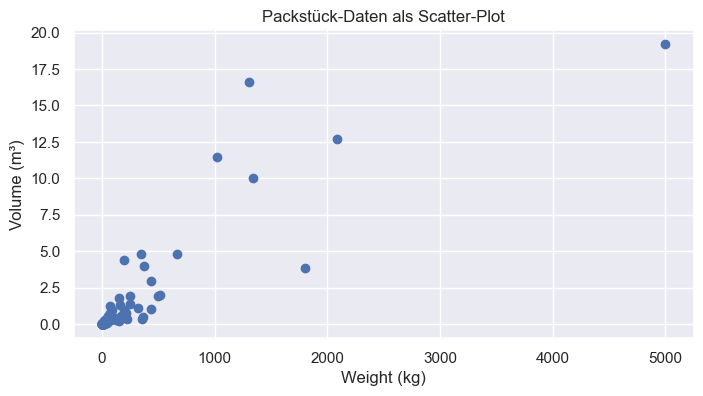

In [15]:
# Plot data as scatter
plt.figure(figsize=(8,4)) 
plt.scatter(X["Gross Weight (kg)"].to_numpy(), X["Volume (m³)"].to_numpy())
plt.title("Packstück-Daten als Scatter-Plot")
plt.xlabel("Weight (kg)")
plt.ylabel("Volume (m³)")

## Durchführen der Cluster-Analyse mittels K-Means

In [16]:
# Define 3 Clusters with random starting centers
kmeans = KMeans(n_clusters=3, init = "random")

# Prediction via K-Means
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Predicted allocation of datapoints to estimated clusters
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1])

## Visualisieren der Cluster-Zuordnung

Merkmalswerte der Zentren
[[5.00000000e+03 1.92000000e+01]
 [1.51220000e+03 1.09119400e+01]
 [8.26701064e+01 4.83005319e-01]]


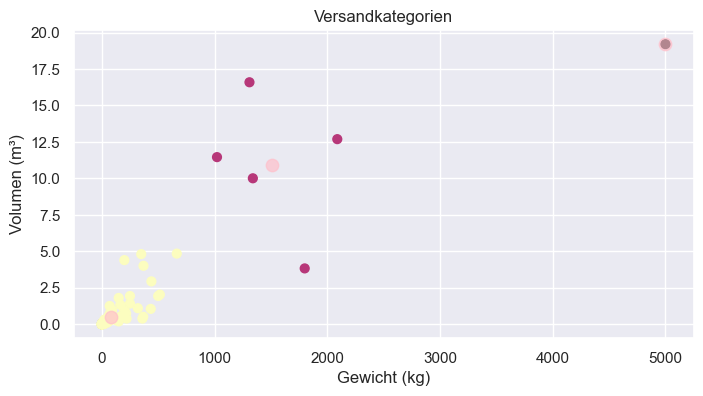

In [17]:
# Visualize allocation of datapoints
plt.figure(figsize=(8,4)) 
plt.scatter(X["Gross Weight (kg)"].to_numpy(), X["Volume (m³)"].to_numpy(), c=y_kmeans, s=40, cmap='magma')

# Visualize Cluster Centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='pink', s=80, alpha=0.7)

plt.title('Versandkategorien')
plt.xlabel('Gewicht (kg)'); plt.ylabel('Volumen (m³)')

#Print coordinates of Cluster Centers
print('Merkmalswerte der Zentren')
print(centers)

## Anwendung der Elbow-Methode

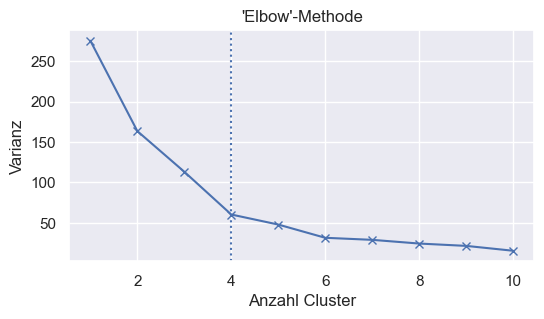

In [23]:
distortions = []
mapping1 = {}
K = range(1, 11)

for k in K:
	kmeanModel = KMeans(n_clusters=k).fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
	
	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]

plt.figure(figsize=(6,3))
plt.plot(K, distortions, "bx-")
plt.axvline(x=4, linestyle= ":")
plt.xlabel("Anzahl Cluster")
plt.ylabel("Varianz")
plt.title("'Elbow'-Methode")
plt.show()

## Durchführung K-Means mit 4 Clustern

In [19]:
# Define 4 Clusters with random starting centers
kmeans2 = KMeans(n_clusters=4, init = "random")

# Prediction via K-Means
kmeans2.fit(X)
y_kmeans2 = kmeans2.predict(X)

# Predicted allocation of datapoints to estimated clusters
y_kmeans2

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3])

Merkmalswerte der Zentren
[[2.70896154e+01 1.53955128e-01]
 [3.53625000e+02 2.08712500e+00]
 [5.00000000e+03 1.92000000e+01]
 [1.51220000e+03 1.09119400e+01]]


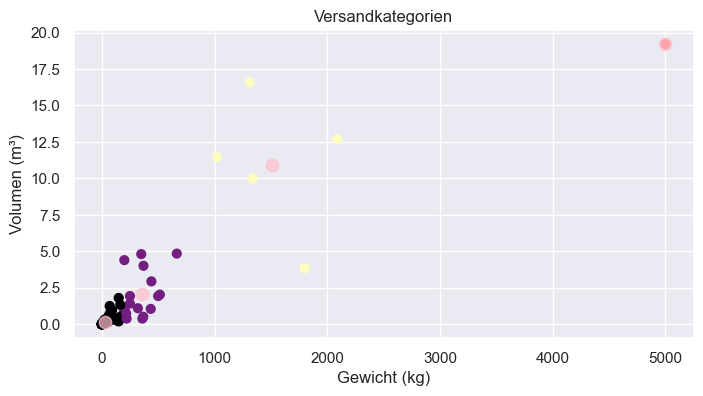

In [20]:
# Visualize allocation of datapoints
plt.figure(figsize=(8,4)) 
plt.scatter(X["Gross Weight (kg)"].to_numpy(), X["Volume (m³)"].to_numpy(), c=y_kmeans2, s=40, cmap='magma')

# Visualize Cluster Centers
centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='pink', s=80, alpha=0.7)

plt.title('Versandkategorien')
plt.xlabel('Gewicht (kg)'); plt.ylabel('Volumen (m³)')

#Print coordinates of Cluster Centers
print('Merkmalswerte der Zentren')
print(centers)

## Durchführen K-Means++ mit 4 Clustern

In [21]:
# Define 4 Clusters based on k-means++ for selection of starting centers
kmeans3 = KMeans(n_clusters=4)

# Prediction via K-Means
kmeans3.fit(X)
y_kmeans3 = kmeans3.predict(X)

# Predicted allocation of datapoints to estimated clusters
y_kmeans3

array([3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2])

Merkmalswerte der Zentren
[[3.53625000e+02 2.08712500e+00]
 [5.00000000e+03 1.92000000e+01]
 [1.51220000e+03 1.09119400e+01]
 [2.70896154e+01 1.53955128e-01]]


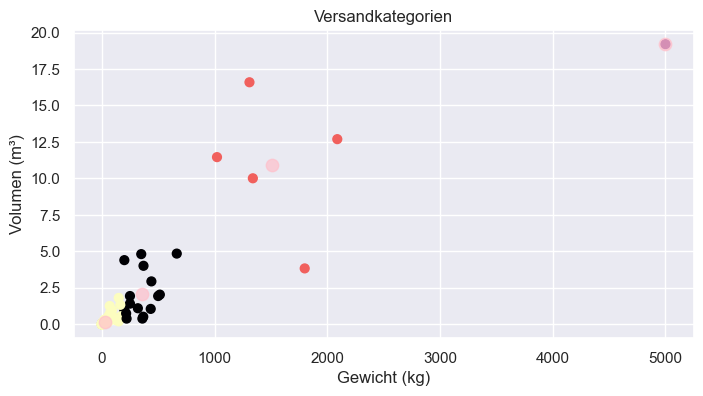

In [22]:
# Visualize allocation of datapoints
plt.figure(figsize=(8,4)) 
plt.scatter(X["Gross Weight (kg)"].to_numpy(), X["Volume (m³)"].to_numpy(), c=y_kmeans3, s=40, cmap='magma')

# Visualize Cluster Centers
centers = kmeans3.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='pink', s=80, alpha=0.7)

plt.title('Versandkategorien')
plt.xlabel('Gewicht (kg)'); plt.ylabel('Volumen (m³)')

#Print coordinates of Cluster Centers
print('Merkmalswerte der Zentren')
print(centers)